In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#얼굴인식

Reference  
copy from : https://github.com/santhalakshminarayana/face-recognition/blob/master/Face_Recognition.ipynb

아티클 : https://medium.com/analytics-vidhya/face-recognition-with-vgg-face-in-keras-96e6bc1951d5

#데이터 준비

In [2]:
%cd /content

/content


In [5]:
#디렉토리까지 강제로 지우는 코드
#뭔가 하다가 망한것 같으면 실행하고 다시 시작하기
!rm -rf __MACOSX
!rm -rf face_data.zip
!rm -rf face_data

In [6]:
!wget https://github.com/eunahlee-viola/WISET-D_Offline/raw/master/Day3/face_data.zip

--2020-08-13 08:56:01--  https://github.com/eunahlee-viola/WISET-D_Offline/raw/master/Day3/face_data.zip
Resolving github.com (github.com)... 13.250.177.223
Connecting to github.com (github.com)|13.250.177.223|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eunahlee-viola/WISET-D_Offline/master/Day3/face_data.zip [following]
--2020-08-13 08:56:01--  https://raw.githubusercontent.com/eunahlee-viola/WISET-D_Offline/master/Day3/face_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2230676 (2.1M) [application/zip]
Saving to: ‘face_data.zip’

face_data.zip       100%[===================>]   2.13M  --.-KB/s    in 0.03s   

2020-08-13 08:56:02 (71.3 MB/s) - ‘face_data.zip’ saved [2230676/2230676]



In [7]:
%cd /content

/content


In [8]:
!unzip face_data.zip

Archive:  face_data.zip
  inflating: Test_images/faker_25.jpg  
  inflating: Test_images/faker_27.jpg  
  inflating: Test_images/faker_28.jpg  
  inflating: Test_images/faker_29.jpg  
  inflating: Test_images/faker_32.jpg  
  inflating: Test_images/faker_33.jpg  
  inflating: Test_images/iu_23.jpg   
  inflating: Test_images/iu_24.jpg   
  inflating: Test_images/iu_25.jpg   
  inflating: Test_images/iu_27.jpg   
  inflating: Test_images/iu_28.jpg   
  inflating: Test_images/iu_30.jpg   
  inflating: Test_images/iu_33.jpg   
 extracting: Test_images/iu_34.jpg   
  inflating: Test_images/jobs_28.jpg  
  inflating: Test_images/jobs_30.jpg  
  inflating: Test_images/jobs_31.jpg  
  inflating: Test_images/jobs_32.jpg  
  inflating: Test_images/jobs_33.jpg  
  inflating: Test_images/jobs_36.jpg  
  inflating: Test_images/lea_1.jpg   
  inflating: Test_images/lea_13.jpg  
  inflating: Test_images/lea_2.jpg   
  inflating: Test_images/lea_7.jpg   
  inflating: Test_images/lea_8.jpg   
  inflat

In [9]:
!mkdir face_data #압축풀린 파일이 원하는 디렉토리 구조로 만들어져 있지 않아서 수정

In [10]:
!mv Images/ face_data/Images
!mv Test_images face_data/Test_images

###이미지 가져오기

In [11]:
path='/content/face_data'

In [12]:
%cd $path

/content/face_data


In [13]:
import os
import glob

In [14]:
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/Images/*_[1-9]*.jpg'):
  image_path_names.append(file_name)
  person_names.add(image_path_names[-1].split('/')[-1].split('_')[0])

In [15]:
len(image_path_names)

48

In [16]:
person_names

{'faker', 'iu', 'jobs', 'lea'}

#얼굴부분 crop
얼굴부분 탐지하여 crop  
dlib의 face detector를 사용

In [17]:
# Download Dlib CNN face detector
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2020-08-13 08:57:09--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   393KB/s    in 1.7s    

2020-08-13 08:57:11 (393 KB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [18]:
!bzip2 -dk mmod_human_face_detector.dat.bz2

In [19]:
%rm mmod_human_face_detector.dat.bz2

In [20]:
import cv2
import matplotlib.pyplot as plt
import dlib

####DLIB Face Detector 로딩

In [21]:
# Load CNN face detector into dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [22]:
os.mkdir(path+'/Images_crop/')

In [23]:
# For each person create a separate folder
for person in person_names:
  os.mkdir(path+'/Images_crop/'+person+'/')

####Images 폴더 파일들 crop
Images 폴더의 파일들을 읽어 Images_crop에 생성

In [24]:
# Detect face, crop detected face and save them in corresponding person folder
for file_name in image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  if right==0: continue
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

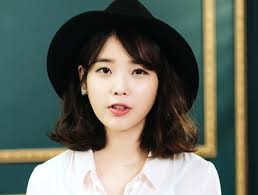

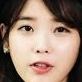

In [25]:
from IPython.display import Image
display(Image('Images/iu_10.jpg'))
display(Image('Images_crop/iu/iu_10.jpg'))

In [26]:
# Get Image names for testing
test_image_path_names=[]
for file_name in glob.glob(path+'/Test_images/*_*.jpg'):
  test_image_path_names.append(file_name)

In [27]:
len(test_image_path_names)

25

####Test_images 폴더 파일들 crop
Test_images 폴더의 파일들을 읽어 Images_crop에 생성

In [28]:
os.mkdir(path+'/Test_Images_crop/')

In [29]:
# Create Separate folder for each person in "Test_Images_crop" folder
for person in person_names:
  os.mkdir(path+'/Test_Images_crop/'+person+'/')

In [30]:
# Detect face,crop face and save in corresponding folder
for file_name in test_image_path_names:
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  if right==0: continue
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Test_Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

<pre>Here images are sorted to corresponding test and train folders of same person
Directory structure :
|Images /
|  |-- (60 images)
|Images_crop /
|  |--faker
|     |--(images)
|  |--iu / 
|     |--(images)
|  |--jobs / 
|     |--(imgaes)
|Test_Images / 
|  |-- .. / (18 images)
|Test_Images_crop / 
|  |--faker
|     |--(images)
|  |--iu / 
|     |--(images)
|  |--jobs / 
|     |--(imgaes)
|mmod_human_face_detector.dat
</pre>

#VGG Face Model 다운로드

In [31]:
! pip install gdown

In [32]:
#Download pre-trained vgg-face-model-weights as .h5 file
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/face_data/vgg_face_weights.h5
580MB [00:06, 94.3MB/s]


In [33]:
%ls -al

total 567236
drwxr-xr-x 6 root root      4096 Aug 13 09:03 ./
drwxr-xr-x 1 root root      4096 Aug 13 08:56 ../
drwxr-xr-x 2 root root      4096 Aug 13 08:56 Images/
drwxr-xr-x 6 root root      4096 Aug 13 08:58 Images_crop/
-rw-r--r-- 1 root root    729940 Oct  8  2016 mmod_human_face_detector.dat
drwxr-xr-x 2 root root      4096 Aug 13 08:56 Test_images/
drwxr-xr-x 6 root root      4096 Aug 13 09:01 Test_Images_crop/
-rw-r--r-- 1 root root 580085408 Aug 13 09:03 vgg_face_weights.h5


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

#Define VGG_FACE_MODEL Architecture

In [35]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [36]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [38]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

###학습모델 준비

In [39]:
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir(path+'/Images_crop/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [40]:
person_rep

{0: 'iu', 1: 'jobs', 2: 'lea', 3: 'faker'}

In [41]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [42]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_Images_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('Test_Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [43]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [44]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [45]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

###모델 정의

In [46]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

###모델 학습

In [47]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 47 samples, validate on 25 samples
Epoch 1/100
47/47 [==============================] - 1s 23ms/sample - loss: 1.7233 - acc: 0.3617 - val_loss: 0.7092 - val_acc: 0.9200
Epoch 2/100
47/47 [==============================] - 0s 354us/sample - loss: 0.7645 - acc: 0.8936 - val_loss: 0.5625 - val_acc: 0.8800
Epoch 3/100
47/47 [==============================] - 0s 380us/sample - loss: 0.7914 - acc: 0.7872 - val_loss: 0.6506 - val_acc: 0.8000
Epoch 4/100
47/47 [==============================] - 0s 326us/sample - loss: 0.5849 - acc: 0.9787 - val_loss: 0.5959 - val_acc: 0.8400
Epoch 5/100
47/47 [==============================] - 0s 333us/sample - loss: 0.6177 - acc: 0.9362 - val_loss: 0.5812 - val_acc: 0.9200
Epoch 6/100
47/47 [==============================] - 0s 420us/sample - loss: 0.4983 - acc: 1.0000 - val_loss: 0.5703 - val_acc: 0.9200
Epoch 7/100
47/47 [==============================] - 0s 379us/sample - loss: 0.5778 - acc: 0.9362 - val_loss: 0.5498 - val_acc: 0.9600
Epoch 8/100


In [48]:
# Save model for later use
tf.keras.models.save_model(classifier_model,'face_classifier_model.h5')

In [49]:
# Load saved model
classifier_model=tf.keras.models.load_model('face_classifier_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [50]:
# Path to folder which contains images to be tested and predicted
test_images_path=path+'/Test_Images/'

In [51]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

#얼굴인식 실행

In [61]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [76]:
# Label names for class numbers
person_rep={0: 'iu', 1: 'jobs', 2: 'lea', 3: 'faker'}

In [77]:
os.mkdir(path+'/Predictions')

FileExistsError: ignored

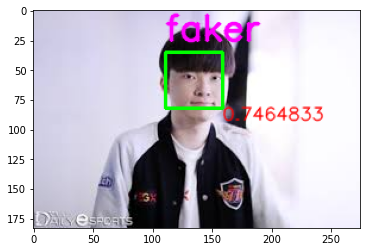

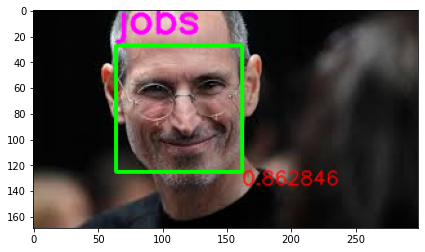

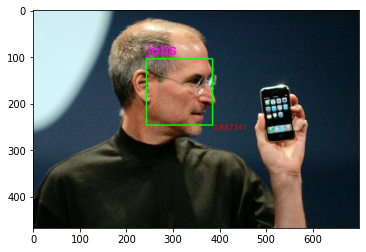

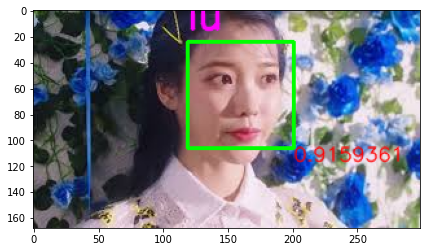

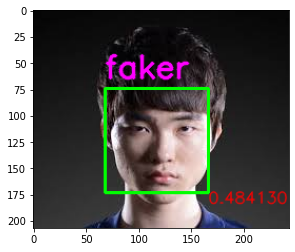

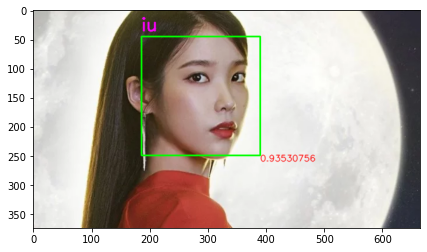

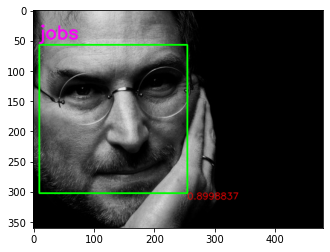

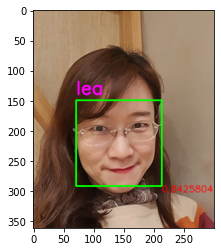

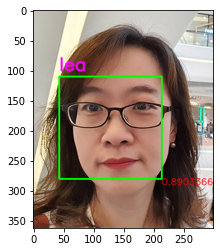

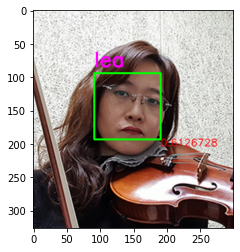

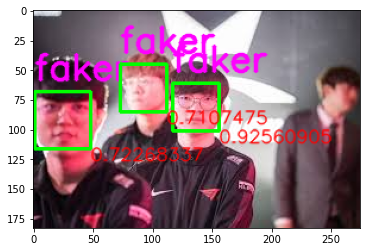

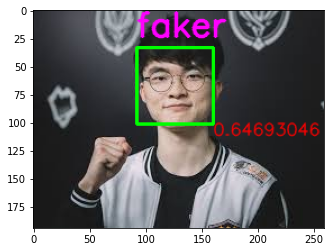

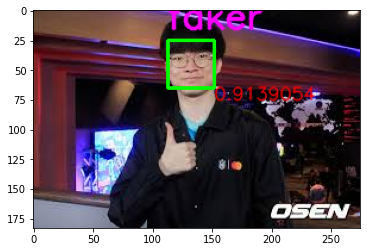

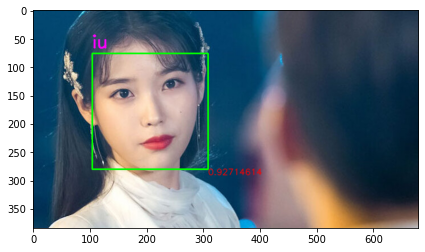

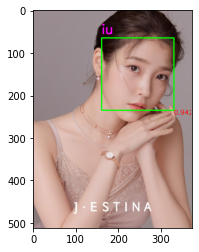

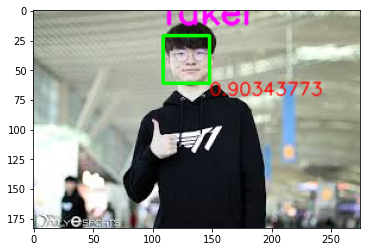

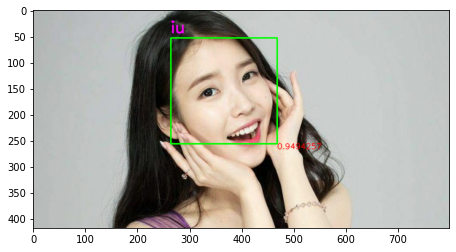

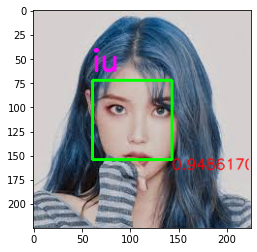

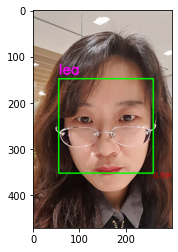

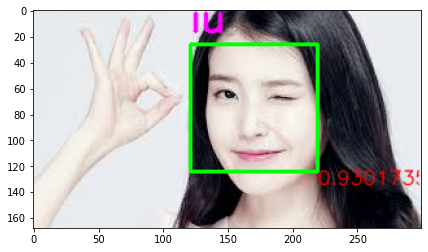

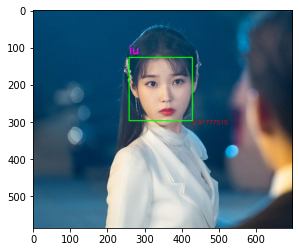

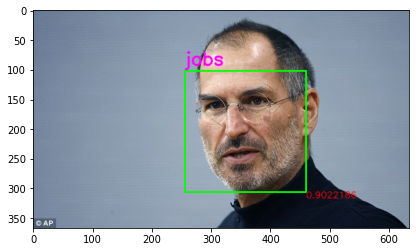

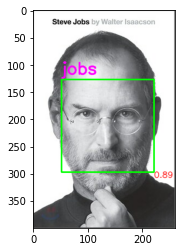

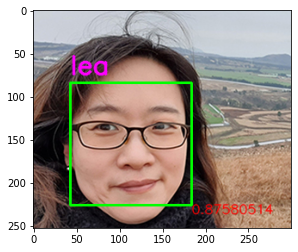

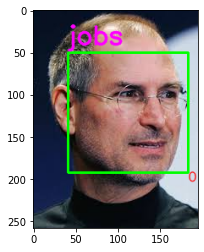

In [78]:
for img_name in os.listdir(path+'/Test_images/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread(path+'/Test_images/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # 얼굴 탐지
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/Test_images/crop_img.jpg',img_crop)
    
    # 얼굴 영역 crop
    crop_img=load_img(path+'/Test_images/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # 얼굴 영역 인식
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/Test_images/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/Predictions/'+img_name,img)
  plot(img)